# Linear Regression from scratch with TensorFLow

* Training a linear regression from scratch with gradient descent
* Define loss
* Compute the gradients of the loss fuction with respect to the model weights
* Use Tensorflow's automatic differentiation capability (`tf.GradientTape`)
* Create training loop to learn/update the weights 


In [4]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [5]:
print(tf.__version__)

2.4.1


For linear regression model
\begin{equation}
\hat{Y} = w_0X + w_1
\end{equation}

Create training dataset:

In [6]:
X = tf.constant(range(10), dtype=tf.float32)
Y = 2 * X + 10

print("X:{}".format(X))
print("Y:{}".format(Y))

X:[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Y:[10. 12. 14. 16. 18. 20. 22. 24. 26. 28.]


Create a test dataset to evaluate models:

In [7]:
X_test = tf.constant(range(10, 20), dtype=tf.float32)
Y_test = 2 * X_test + 10

print("X_test:{}".format(X_test))
print("Y_test:{}".format(Y_test))

X_test:[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Y_test:[30. 32. 34. 36. 38. 40. 42. 44. 46. 48.]


$\hat{Y}$ represents the vector containing model predictions:

In [8]:
y_mean = Y.numpy().mean()

def predict_mean(X):
    y_hat = [y_mean] * len(X)
    return y_hat

Y_hat = predict_mean(X_test)

Loss Function - use mean squared error:
\begin{equation}
MSE = \frac{1}{m}\sum_{i=1}^{m}(\hat{Y}_i-Y_i)^2
\end{equation}

In [9]:
def loss_mse(X, Y, w0, w1):
    Y_hat = w0 * X + w1
    errors = (Y_hat - Y)**2
    return tf.reduce_mean(errors)

Gradient Function:

To use gradient descent we need to take the partial derivatives of the loss function with respect to each of the weights. Use Tensorflow's automatic differentiation capabilities (and save the effort of manually computing the derivatives).

During gradient descent, think of the loss as a function of the parameters $w_0$ and $w_1$. Compute the partial derivative with respect to these variables. 

Wrap our loss computation within the context of `tf.GradientTape` instance which will record gradient information:

```python
with tf.GradientTape() as tape:
    loss = # computation 
```

This will allow us to later compute the gradients of any tensor computed within the `tf.GradientTape` context with respect to instances of `tf.Variable`:

```python
gradients = tape.gradient(loss, [w0, w1])
```

In [10]:
def compute_gradients(X, Y, w0, w1):
    with tf.GradientTape() as tape:
        loss = loss_mse(X, Y, w0, w1)
    
    return tape.gradient(loss, [w0, w1])

Training Loop:

Try a simple training loop that converges. Note we are ignoring best practices like batching, creating a separate test set, and random weight initialization for the sake of simplicity.

In [14]:
STEPS = 1000
LEARNING_RATE = .02
MSG = "STEP {step} - loss: {loss}, w0: {w0}, w1: {w1}\n"


w0 = tf.Variable(0.0)
w1 = tf.Variable(0.0)


for step in range(0, STEPS + 1):

    dw0, dw1 = compute_gradients(X, Y, w0, w1)
    w0.assign_sub(LEARNING_RATE * dw0)
    w1.assign_sub(LEARNING_RATE * dw1)

    if step % 100 == 0:
        loss = loss_mse(X, Y, w0, w1)
        print(MSG.format(step=step, loss=loss, w0=w0.numpy(), w1=w1.numpy()))

STEP 0 - loss: 35.70719528198242, w0: 4.079999923706055, w1: 0.7599999904632568

STEP 100 - loss: 2.6017532348632812, w0: 2.4780430793762207, w1: 7.002389907836914

STEP 200 - loss: 0.26831889152526855, w0: 2.153517961502075, w1: 9.037351608276367

STEP 300 - loss: 0.027671903371810913, w0: 2.0493006706237793, w1: 9.690855979919434

STEP 400 - loss: 0.0028539239428937435, w0: 2.0158326625823975, w1: 9.90071964263916

STEP 500 - loss: 0.0002943490108009428, w0: 2.005084753036499, w1: 9.96811580657959

STEP 600 - loss: 3.0356444767676294e-05, w0: 2.0016329288482666, w1: 9.989760398864746

STEP 700 - loss: 3.1322738323069643e-06, w0: 2.0005245208740234, w1: 9.996710777282715

STEP 800 - loss: 3.2238213520940917e-07, w0: 2.0001683235168457, w1: 9.998944282531738

STEP 900 - loss: 3.369950718479231e-08, w0: 2.000054359436035, w1: 9.999658584594727

STEP 1000 - loss: 3.6101481803996194e-09, w0: 2.0000178813934326, w1: 9.99988842010498



Also compare the test loss:

In [15]:
loss = loss_mse(X_test, Y_test, w0, w1)
loss.numpy()

2.4563633e-08

## Try similar implementation for non-linear model

Modeling a non-linear function: $y=xe^{-x^2}$

In [16]:
X = tf.constant(np.linspace(0, 2, 1000), dtype=tf.float32)
Y = X * tf.exp(-X**2)

In [17]:
%matplotlib inline

plt.plot(X, Y)

In [18]:
def make_features(X):
    f1 = tf.ones_like(X)  # Bias.
    f2 = X
    f3 = tf.square(X)
    f4 = tf.sqrt(X)
    f5 = tf.exp(X)
    return tf.stack([f1, f2, f3, f4, f5], axis=1)

tf.squeeze - Removes dimensions of size 1 from the shape of a tensor. https://www.tensorflow.org/api_docs/python/tf/squeeze

In [19]:
def predict(X, W):
    return tf.squeeze(X @ W, -1)

In [20]:
def loss_mse(X, Y, W):
    Y_hat = predict(X, W)
    errors = (Y_hat - Y)**2
    return tf.reduce_mean(errors)

In [21]:
def compute_gradients(X, Y, W):
    with tf.GradientTape() as tape:
        loss = loss_mse(Xf, Y, W)
    return tape.gradient(loss, W)

STEP: 2000 MSE: 0.0023767943494021893


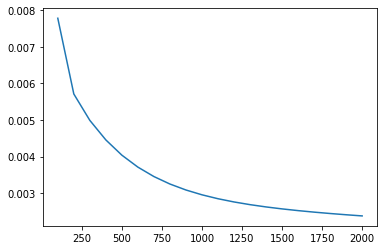

In [22]:
STEPS = 2000
LEARNING_RATE = .02


Xf = make_features(X)
n_weights = Xf.shape[1]

W = tf.Variable(np.zeros((n_weights, 1)), dtype=tf.float32)

# For plotting
steps, losses = [], []
plt.figure()


for step in range(1, STEPS + 1):

    dW = compute_gradients(X, Y, W)
    W.assign_sub(dW * LEARNING_RATE)

    if step % 100 == 0:
        loss = loss_mse(Xf, Y, W)
        steps.append(step)
        losses.append(loss)
        plt.clf()
        plt.plot(steps, losses)


print("STEP: {} MSE: {}".format(STEPS, loss_mse(Xf, Y, W)))

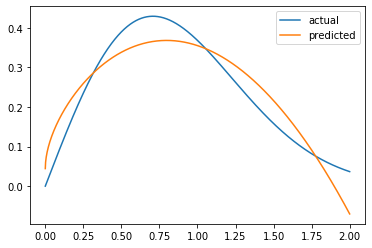

In [23]:
plt.figure()
plt.plot(X, Y, label='actual')
plt.plot(X, predict(Xf, W), label='predicted')
plt.legend()